In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import statements required for Plotly 
# Plotly is used to get details when hovered
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
#SMOTE (Synthetic Minority Over-sampling TEchnique) is coming under the third step. It's the process of creating a new minority classes from the datasets.


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [5]:
data= pd.read_csv('HR-Employee-Attrition.csv')
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [8]:
#Checking null values

display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'Attrition Breakdown')

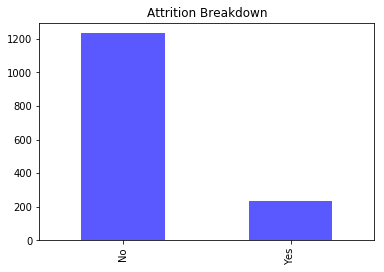

In [11]:
# Total attritions 

data.Attrition.value_counts().plot(kind='bar', color='blue', alpha=.65)
plt.title('Attrition Breakdown')

Text(0, 0.5, 'Frequency of Attrition')

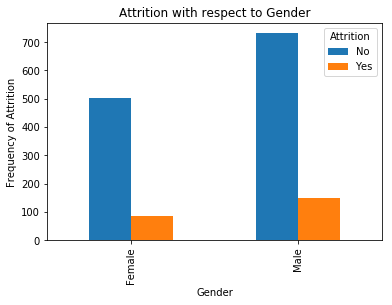

In [24]:
#Breakdown of Attribution data with respect to Gender

pd.crosstab(data.Gender,data.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

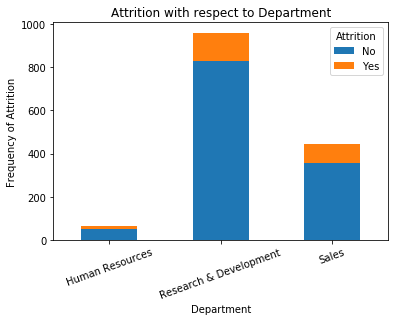

In [27]:
pd.crosstab(data.Department,data.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=20)

Text(0, 0.5, 'Frequency of Attrition')

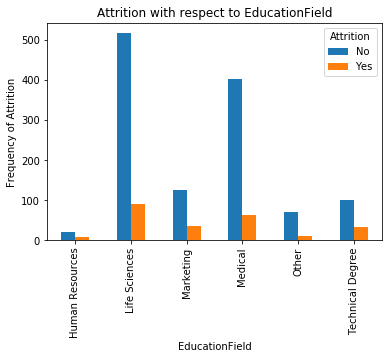

In [28]:
#Breakdown of Attribution data with respect to EducationField

pd.crosstab(data.EducationField,data.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

[Text(0.5, 1.0, 'WorklifeBalance against Satisfaction')]

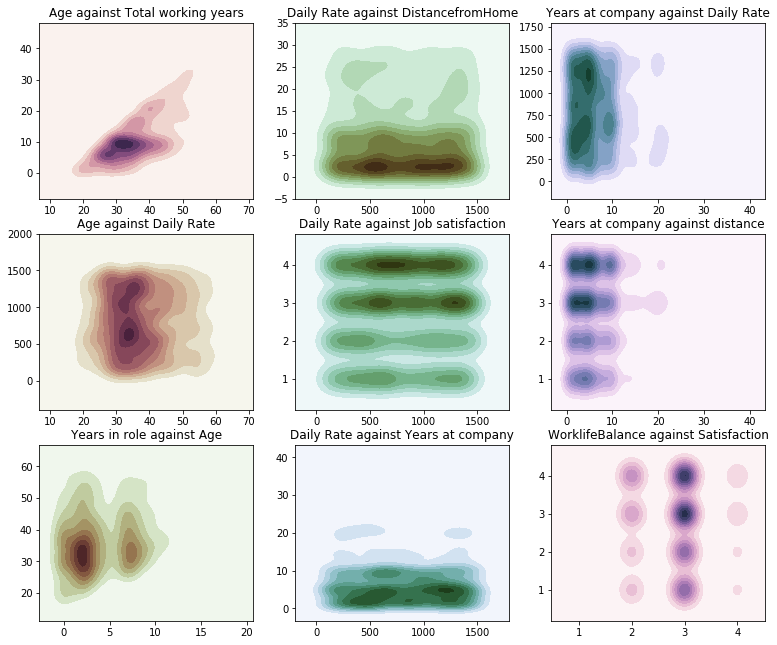

In [46]:
# Distribution of Data Set

# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(13, 11), sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data.Age.values
y = data.TotalWorkingYears.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
x = data.Age.values
y = data.DailyRate.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,0])
axes[1,0].set( title = 'Age against Daily Rate')


cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)

# Generate and plot
x = data.YearsInCurrentRole.values
y = data.Age.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)

# Generate and plot
x = data.DailyRate.values
y = data.DistanceFromHome.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Daily Rate against DistancefromHome')


cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)

# Generate and plot
x = data.DailyRate.values
y = data.JobSatisfaction.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)

# Generate and plot
x = data.DailyRate.values
y = data.YearsAtCompany.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set( title = 'Daily Rate against Years at company')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# Generate and plot
x = data.YearsAtCompany.values
y = data.DailyRate.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data.YearsAtCompany.values
y = data.JobSatisfaction.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set( title = 'Years at company against distance')


cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# Generate and plot
x = data.WorkLifeBalance.values
y = data.JobSatisfaction.values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

### Splitting Data into Train and Test sets

In [55]:
X = data.drop('Attrition', axis=1)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [56]:
y= data['Attrition']
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

### Feature Engineering and Categorical Encoding

In [74]:
 # Empty list to store columns with categorical data
    
def encoding(data):
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)
    
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)

    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]


    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

x_train_encode=encoding(X_train)
x_test_encode=encoding(X_test)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [77]:
# Define a dictionary for the target mapping
def target_encode(data):
    target_map = {'Yes':1, 'No':0}

    # Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target

y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

####  Implementing Machine Learning Models

In [78]:
oversampler=SMOTE(random_state=0)
smote_train,smote_target=oversampler.fit_sample(x_train_encode,y_train_encode)

### Random Forest Classifier

In [82]:
# Random Forest parameters
seed=0
rf_params = {
 'n_jobs': -1,
 'n_estimators': 1000,
# ‘warm_start’: True, 
 'max_features': 0.3,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'max_features' : 'sqrt',
 'random_state' : seed,
 'verbose': 0
}

In [83]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [84]:
rf_predictions = rf.predict(x_test_encode)

In [98]:
print('Accuracy score of Random Forest Model: {}'.format(accuracy_score(y_test_encode, rf_predictions)))
print('='*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score of Random Forest Model: 0.8733031674208145
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       182
          1       0.79      0.38      0.52        39

avg / total       0.87      0.87      0.85       221



### Feature Importance
`` The Random Forest classifier in Sklearn also contains a very convenient attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm ``



In [99]:
# Shown below is an Interactive Plotly diagram of the various feature importances

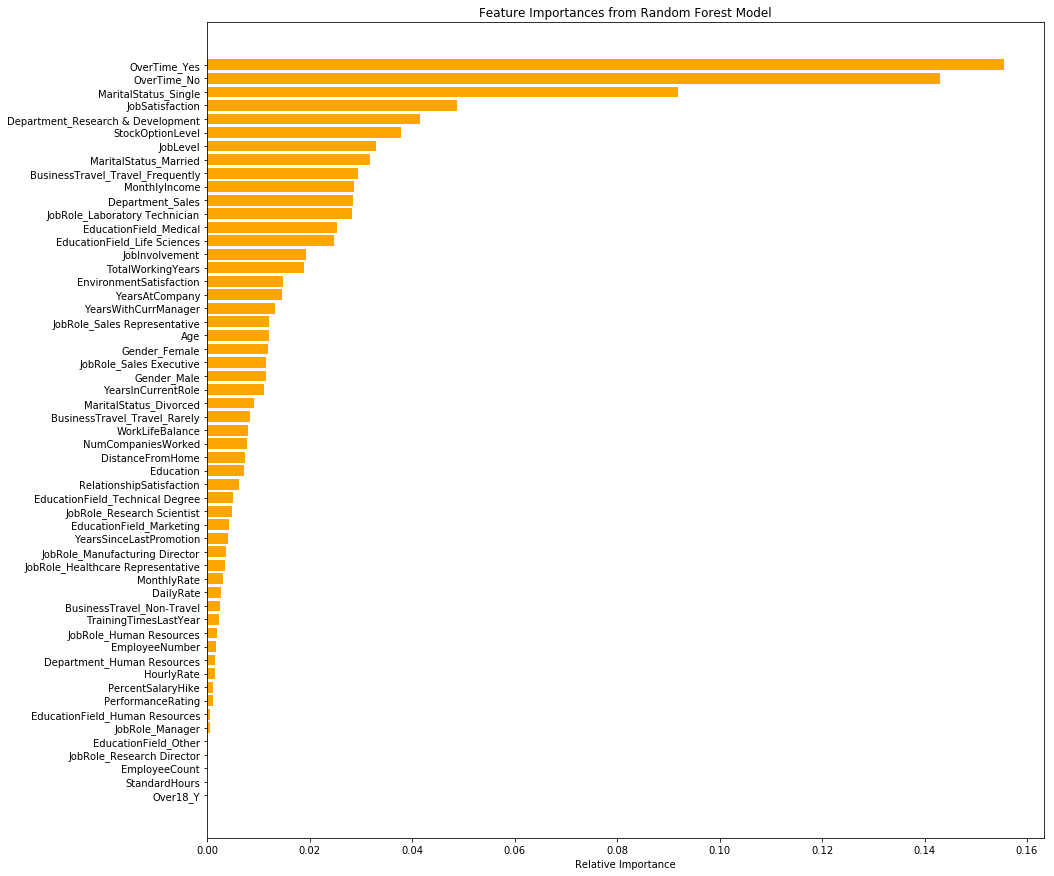

In [101]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances from Random Forest Model')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosted Classifier

In [102]:
# Gradient Boosting Parameters
gb_params ={
 'n_estimators': 1500,
 'max_features': 0.9,
 'learning_rate' : 0.25,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'subsample': 1,
 'max_features' : 'sqrt',
 'random_state' : seed,
 'verbose': 0
}

In [103]:
gb = GradientBoostingClassifier(**gb_params)

# Fit the model to our SMOTEd train and target

gb.fit(smote_train, smote_target)


# Get our predictions

gb_predictions = gb.predict(x_test_encode)

print('Accuracy score of Gradient Boost Model: {}'.format(accuracy_score(y_test_encode, gb_predictions)))
print('='*80)
print(classification_report(y_test_encode, gb_predictions))

Accuracy score of Gradient Boost Model: 0.8416289592760181
             precision    recall  f1-score   support

          0       0.87      0.95      0.91       182
          1       0.59      0.33      0.43        39

avg / total       0.82      0.84      0.82       221



In [105]:
features_gb = x_train_encode.columns.values
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)

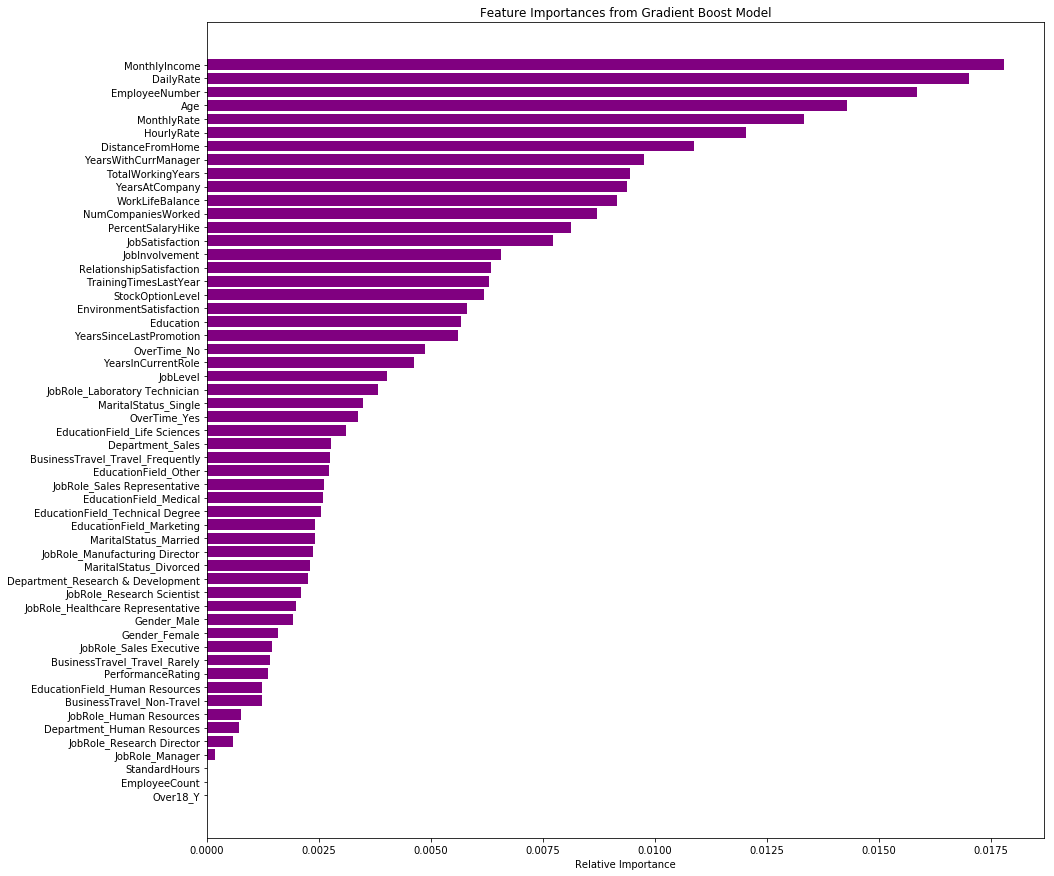

In [107]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances from Gradient Boost Model')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], color='purple', align='center')
plt.yticks(range(len(indices_gb)), [features_gb[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree Classifier

In [108]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
dt_predictions = dt.predict(x_test_encode)

In [112]:
print('Accuracy score of Decision Tree Classifier: {}'.format(accuracy_score(y_test_encode, dt_predictions)))
print('='*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score of Decision Tree Classifier: 0.7873303167420814
             precision    recall  f1-score   support

          0       0.87      0.87      0.87       182
          1       0.40      0.41      0.41        39

avg / total       0.79      0.79      0.79       221



In [115]:
features_dt = x_train_encode.columns.values
importances_dt = dt.feature_importances_
indices_dt = np.argsort(importances_dt)

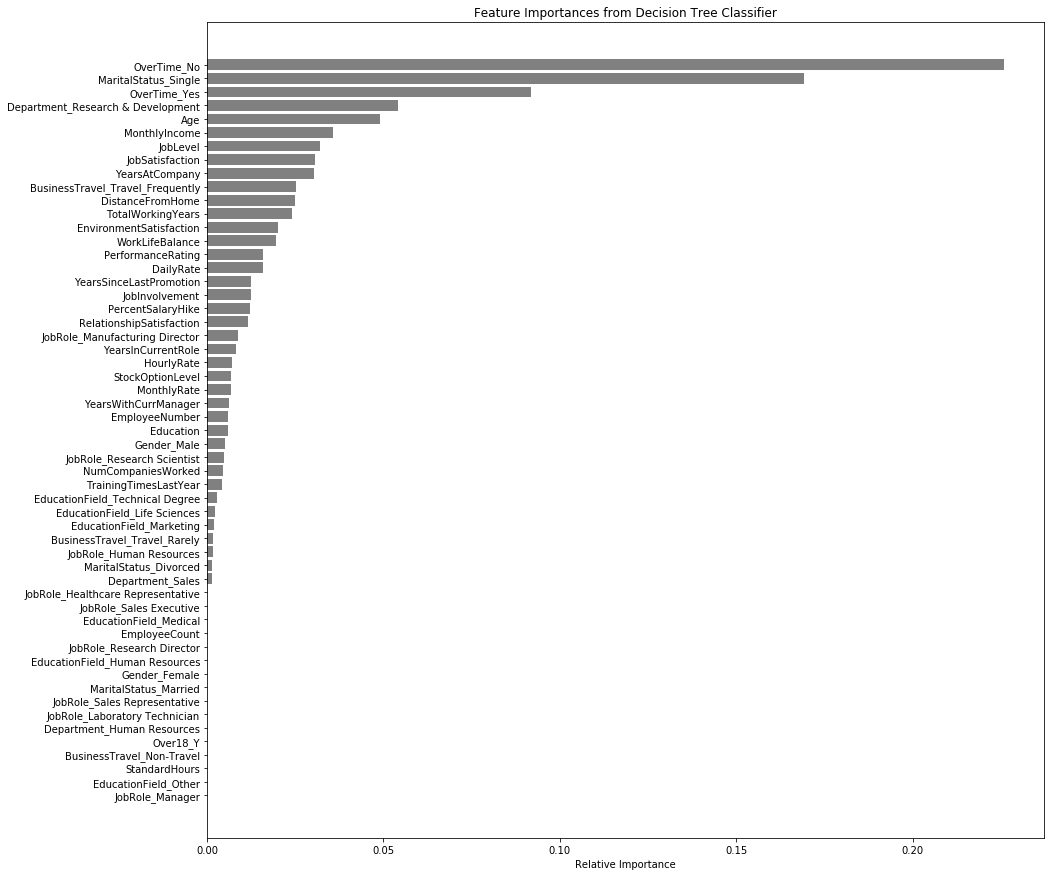

In [116]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances from Decision Tree Classifier')
plt.barh(range(len(indices_dt)), importances_dt[indices_dt], color='grey', align='center')
plt.yticks(range(len(indices_dt)), [features_dt[i] for i in indices_dt])
plt.xlabel('Relative Importance')
plt.show()

In [176]:
for i in [rf, gb,dt]:
    features = x_train_encode.columns.values
    importances = i.feature_importances_
    indices = np.argsort(importances)

    indices_rev = indices[::-1]
    top15 = indices_rev[:15]
    
    feature15 = features[top15]
    imp15 = importances[top15]
    # using naive method 
    # to convert lists to dictionary 
    feature_imp_dict = {} 
    for key in feature15: 
        for value in imp15: 
            feature_imp_dict[key] = value 
            break 
    
    print("Most important features in", i ," and their importance values are: ")
    for j in feature_imp_dict:
        print("Feature: {}".format(j),"Importance value is: {}".format(feature_imp_dict[j]))

Most important features in RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)  and their importance values are: 
Feature: OverTime_Yes Importance value is: 0.15555526684544319
Feature: OverTime_No Importance value is: 0.15555526684544319
Feature: MaritalStatus_Single Importance value is: 0.15555526684544319
Feature: JobSatisfaction Importance value is: 0.15555526684544319
Feature: Department_Research & Development Importance value is: 0.15555526684544319
Feature: StockOptionLevel Importance value is: 0.15555526684544319
Feature: JobLevel Importance value is: 0.15555526684544319
Feature: MaritalStatus_Married Importance value is: 0.155555